In [90]:
# 06/24/2025
#related to analyses for round 2 revisions.

In [5]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rcParams
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import textwrap


In [6]:
r7it="$\it{ros1}$"+"-"+"$\it{7}$"
r3it="$\it{ros1}$"+"-"+"$\it{3}$"
r1it="$\it{ros1}$"+"-"+"$\it{1}$"
dmeit="$\it{dme}$"
rddit="$\it{rdd}$"

In [10]:
sumcolumns=['chr','start','end','name','avg_methy','nC']
bigE_columns=['chr','start','end','wt_1_avg_methy','wt_1_nC','wt_2_avg_methy','wt_2_nC','wt_3_avg_methy','wt_3_nC']
tab="\t"
plt.rcParams["font.family"] = "Arial"


In [11]:
def readindata(file):
    sumcolumns=['chr','start','end','name','avg_methy','nC']
    df=pd.read_csv(sumpath+file, header=None, sep=tab, names=sumcolumns)
    df=df.drop(['name'], axis=1)
    return (df)

In [13]:
def sumby_boxplot(df, samplesdict, mCcontext, hue=None, color=None):
    
    df2plot=pd.DataFrame()
    for key, value in samplesdict.items():  
        df2plot[key]=df[value]
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    #return df2plot
    if hue is not None:
        df2plot=df2plot.melt(id_vars=['DMR'], var_name='sample', value_name='summed m'+mCcontext)
        sns.boxplot(data=df2plot, x="sample", y="summed m"+mCcontext, hue=hue, palette="pastel", ax=ax)
        ax.legend(loc="best", fontsize=14, title=mCcontext+" hyperDMRs",title_fontsize=14)

    else:
        if color is not None:
            c=color
        else:
            c="#a1c9f4"
            
        df2plot=df2plot.melt(var_name='sample', value_name='summed m'+mCcontext)
        sns.boxplot(data=df2plot, x="sample", y="summed m"+mCcontext, ax=ax, color=c)
        
    # general layout
    ax.set_xlabel("", fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel("average m"+mCcontext, fontsize=14)
    
    return fig, ax
    #plt.tight_layout()

r3color="#a1c9f4"
r7color="#ffb482"

In [1085]:
figurepath="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/"

In [22]:
sumpath="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/embryo/"

wt_sc_1_CG_sum_r3_CG=readindata('wt_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')
wt_sc_2_CG_sum_r3_CG=readindata('wt_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')

r3_sc_1_CG_sum_r3_CG=readindata('ros1_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')
r3_sc_2_CG_sum_r3_CG=readindata('ros1_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')

dme_sc_1_CG_sum_r3_CG=readindata('dme_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')
dme_sc_2_CG_sum_r3_CG=readindata('dme_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r3_v_wt_CG.DMRs.hyper.bed')

dme_r3_sc_1_CG_sum_r3_CG=readindata('dme_ros1_sc_1_all_CpG_min5_sumby_r3_v_wt_CG.DMRs.hyper.bed')
dme_r3_sc_2_CG_sum_r3_CG=readindata('dme_ros1_sc_2_all_CpG_min5_sumby_r3_v_wt_CG.DMRs.hyper.bed')


wt_sc_1_CG_sum_r7_CG=readindata('wt_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')
wt_sc_2_CG_sum_r7_CG=readindata('wt_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')

r3_sc_1_CG_sum_r7_CG=readindata('ros1_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')
r3_sc_2_CG_sum_r7_CG=readindata('ros1_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')

dme_sc_1_CG_sum_r7_CG=readindata('dme_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')
dme_sc_2_CG_sum_r7_CG=readindata('dme_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r7_v_wt_CG.DMRs.hyper.bed')

dme_r3_sc_1_CG_sum_r7_CG=readindata('dme_ros1_sc_1_all_CpG_min5_sumby_r7_v_wt_CG.DMRs.hyper.bed')
dme_r3_sc_2_CG_sum_r7_CG=readindata('dme_ros1_sc_2_all_CpG_min5_sumby_r7_v_wt_CG.DMRs.hyper.bed')


wt_sc_1_CG_sum_r1_CG=readindata('wt_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')
wt_sc_2_CG_sum_r1_CG=readindata('wt_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')

r3_sc_1_CG_sum_r1_CG=readindata('ros1_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')
r3_sc_2_CG_sum_r1_CG=readindata('ros1_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')

dme_sc_1_CG_sum_r1_CG=readindata('dme_sc_1_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')
dme_sc_2_CG_sum_r1_CG=readindata('dme_sc_2_all_CpG_min5_CGcon_pass_fixed_sumby_r1_v_wt_CG.DMRs.hyper.bed')

dme_r3_sc_1_CG_sum_r1_CG=readindata('dme_ros1_sc_1_all_CpG_min5_sumby_r1_v_wt_CG.DMRs.hyper.bed')
dme_r3_sc_2_CG_sum_r1_CG=readindata('dme_ros1_sc_2_all_CpG_min5_sumby_r1_v_wt_CG.DMRs.hyper.bed')


In [23]:
def process_sperm_sum (wtsc1,wtsc2,r3sc1,r3sc2,dmesc1,dmesc2,dmer3sc1,dmer3sc2):
   
    wtscoutdf = wtsc1.merge(wtsc2, on=['chr','start','end'],how ='inner')
    wtscoutdf.columns=['chr','start','end','wtsc_1_avg_methy','wtsc_1_nC','wtsc_2_avg_methy','wtsc_2_nC']

    r3scoutdf = r3sc1.merge(r3sc2, on=['chr','start','end'],how ='inner')
    r3scoutdf.columns=['chr','start','end','r3sc_1_avg_methy','r3sc_1_nC','r3sc_2_avg_methy','r3sc_2_nC']

    dmescoutdf = dmesc1.merge(dmesc2, on=['chr','start','end'],how ='inner')
    dmescoutdf.columns=['chr','start','end','dmesc_1_avg_methy','dmesc_1_nC','dmesc_2_avg_methy','dmesc_2_nC']

    dmer3scoutdf = dmer3sc1.merge(dmer3sc2, on=['chr','start','end'],how ='inner')
    dmer3scoutdf.columns=['chr','start','end','dmer3sc_1_avg_methy','dmer3sc_1_nC','dmer3sc_2_avg_methy','dmer3sc_2_nC']

    columns = ['chr','start','end']
    
    outdf=wtscoutdf.merge(r3scoutdf, on=columns,how='inner').merge(dmescoutdf, on=columns,how='inner').merge(dmer3scoutdf, on=columns,how='inner')
    return outdf


In [24]:
def sumby_boxplot(df, samplesdict, mCcontext, hue=None, color=None):
    
    df2plot=pd.DataFrame()
    for key, value in samplesdict.items():  
        df2plot[key]=df[value]
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    #return df2plot
    if hue is not None:
        df2plot=df2plot.melt(id_vars=['DMR'], var_name='sample', value_name='summed m'+mCcontext)
        sns.boxplot(data=df2plot, x="sample", y="summed m"+mCcontext, hue=hue, palette="pastel", ax=ax)
        ax.legend(loc="best", fontsize=14, title=mCcontext+" hyperDMRs",title_fontsize=14)

    else:
        if color is not None:
            c=color
        else:
            c="#a1c9f4"
            
        df2plot=df2plot.melt(var_name='sample', value_name='summed m'+mCcontext)
        sns.boxplot(data=df2plot, x="sample", y="summed m"+mCcontext, ax=ax, color=c)
        
    # general layout
    ax.set_xlabel("", fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel("average m"+mCcontext, fontsize=14)
    
    return fig, ax
    plt.tight_layout()

r3color="#a1c9f4"
r7color="#ffb482"

In [25]:
sc_r3CGr_CG=process_sperm_sum(wt_sc_1_CG_sum_r3_CG,wt_sc_2_CG_sum_r3_CG,r3_sc_1_CG_sum_r3_CG,r3_sc_2_CG_sum_r3_CG,
                  dme_sc_1_CG_sum_r3_CG,dme_sc_2_CG_sum_r3_CG,dme_r3_sc_1_CG_sum_r3_CG,dme_r3_sc_2_CG_sum_r3_CG)



In [26]:
sc_r7CGr_CG=process_sperm_sum(wt_sc_1_CG_sum_r7_CG,wt_sc_2_CG_sum_r7_CG,r3_sc_1_CG_sum_r7_CG,r3_sc_2_CG_sum_r7_CG,
                  dme_sc_1_CG_sum_r7_CG,dme_sc_2_CG_sum_r7_CG,dme_r3_sc_1_CG_sum_r7_CG,dme_r3_sc_2_CG_sum_r7_CG)



In [27]:
sc_r1CGr_CG=process_sperm_sum(wt_sc_1_CG_sum_r1_CG,wt_sc_2_CG_sum_r1_CG,r3_sc_1_CG_sum_r1_CG,r3_sc_2_CG_sum_r1_CG,
                  dme_sc_1_CG_sum_r1_CG,dme_sc_2_CG_sum_r1_CG,dme_r3_sc_1_CG_sum_r1_CG,dme_r3_sc_2_CG_sum_r1_CG)



In [28]:
spermplot={'Col-0 1':'wtsc_1_avg_methy','Col-0 2':'wtsc_2_avg_methy',
           'ros1-3 1':'r3sc_1_avg_methy','ros1-3 2':'r3sc_2_avg_methy',
           'dme-2/+ 1':'dmesc_1_avg_methy','dme-2/+ 2':'dmesc_2_avg_methy',
           'r3;dme/+ 1':'dmer3sc_1_avg_methy','r3;dme/+ 2':'dmer3sc_2_avg_methy'}

In [30]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r3CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r3CGr_CG[['r3sc_1_avg_methy','r3sc_2_avg_methy']]), equal_var=True)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)

T statistic: -88.12220013617632
P-value: 0.00012874947231400474
Bonferonni-p: 0.00038624841694201423


In [31]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r3CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r3CGr_CG[['dmesc_1_avg_methy','dmesc_2_avg_methy']]), equal_var=True)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)

T statistic: -20.238407806363718
P-value: 0.0024325423077749004
Bonferonni-p: 0.007297626923324701


In [32]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r3CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r3CGr_CG[['dmer3sc_1_avg_methy','dmer3sc_2_avg_methy']]), equal_var=False)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)


T statistic: -70.07681728218435
P-value: 0.00025399134672462445
Bonferonni-p: 0.0007619740401738733


In [33]:
np.mean(sc_r7CGr_CG[['r3sc_2_avg_methy','wtsc_2_avg_methy']])

r3sc_2_avg_methy    0.668108
wtsc_2_avg_methy    0.416783
dtype: float64

In [34]:
np.mean(sc_r7CGr_CG[['dmesc_2_avg_methy','wtsc_2_avg_methy']])

dmesc_2_avg_methy    0.498507
wtsc_2_avg_methy     0.416783
dtype: float64

In [35]:
np.mean(sc_r7CGr_CG[['dmesc_1_avg_methy','dmesc_2_avg_methy']])

dmesc_1_avg_methy    0.492965
dmesc_2_avg_methy    0.498507
dtype: float64

In [36]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r7CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r7CGr_CG[['r3sc_1_avg_methy','r3sc_2_avg_methy']]), equal_var=False)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)

T statistic: -12.909472907609535
P-value: 0.03186552253604025
Bonferonni-p: 0.09559656760812074


In [37]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r7CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r7CGr_CG[['dmesc_1_avg_methy','dmesc_2_avg_methy']]), equal_var=False)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)

T statistic: -13.798127500093385
P-value: 0.015168216192722803
Bonferonni-p: 0.04550464857816841


In [38]:
tests=3
t_stat, p_value = stats.ttest_ind(np.mean(sc_r7CGr_CG[['wtsc_1_avg_methy','wtsc_2_avg_methy']]), np.mean(sc_r7CGr_CG[['dmer3sc_1_avg_methy','dmer3sc_2_avg_methy']]), equal_var=False)
print("T statistic:", t_stat)
print("P-value:", p_value)
bonferonni_p=p_value*tests
print("Bonferonni-p:",bonferonni_p)

T statistic: -35.76539733561086
P-value: 0.0012410765840714926
Bonferonni-p: 0.003723229752214478


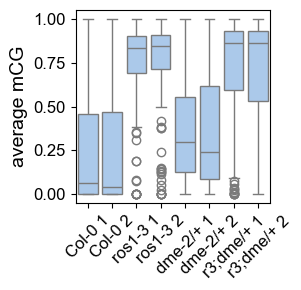

In [39]:
fig,ax=sumby_boxplot(sc_r3CGr_CG, spermplot, "CG")
fig.set_size_inches(3,3)

plt.tight_layout()

#plt.savefig(figurepath+"r3_CGr_sumby_sperm_boxplot.pdf", dpi=350)


In [40]:
len(sc_r7CGr_CG)

80

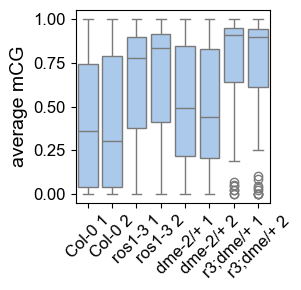

In [41]:
fig,ax=sumby_boxplot(sc_r7CGr_CG, spermplot, "CG")
fig.set_size_inches(3,3)

plt.tight_layout()

#plt.savefig(figurepath+"r7_CGr_sumby_sperm_boxplot.pdf", dpi=350)


In [42]:
len(sc_r1CGr_CG)

176

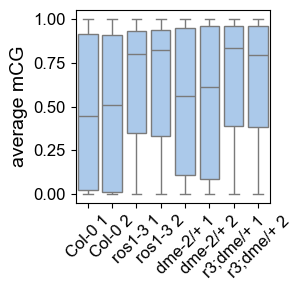

In [43]:
fig,ax=sumby_boxplot(sc_r1CGr_CG, spermplot, "CG")
fig.set_size_inches(3,3)

plt.tight_layout()

#plt.savefig(figurepath+"r1_CGr_sumby_sperm_boxplot.pdf", dpi=350)


In [46]:
path="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/chromatin_state/genes/"
featurebed=['chr','start','end','ID','score','strand','DMR_chr','DMR_start','DMR_end']
dme_1kb_genes=pd.read_csv(path+"genes_1kb_WT_and_ros1_matVpathypo.bed", sep=tab, header=None, names=featurebed).drop_duplicates("ID")
ros1dme_1kb_genes=pd.read_csv(path+"genes_1kb_ros1_needed_matVpathypo.bed", sep=tab, header=None, names=featurebed).drop_duplicates("ID")
r3_genes_1kb=pd.read_csv(path+"genes_1kb_r3_hyper.bed", sep=tab, header=None, names=featurebed).drop_duplicates("ID")
r7_genes_1kb=pd.read_csv(path+"genes_1kb_r7_hyper.bed", sep=tab, header=None, names=featurebed).drop_duplicates("ID")
ros1_genes_1kb=pd.concat([r3_genes_1kb, r7_genes_1kb], axis=0).drop_duplicates("ID") 

In [48]:
# Filter for rows with NO overlap between [start, end] and [DMR_start, DMR_end]
ros1dme_1kb_genes_notGBM = ros1dme_1kb_genes[(ros1dme_1kb_genes['end'] < ros1dme_1kb_genes['DMR_start']) | (ros1dme_1kb_genes['DMR_end'] < ros1dme_1kb_genes['start'])]
dme_1kb_genes_notGBM = dme_1kb_genes[(dme_1kb_genes['end'] < dme_1kb_genes['DMR_start']) | (dme_1kb_genes['DMR_end'] < dme_1kb_genes['start'])]
r3_genes_1kb_notGBM = r3_genes_1kb[(r3_genes_1kb['end'] < r3_genes_1kb['DMR_start']) | (r3_genes_1kb['DMR_end'] < r3_genes_1kb['start'])]
r7_genes_1kb_notGBM = r7_genes_1kb[(r7_genes_1kb['end'] < r7_genes_1kb['DMR_start']) | (r7_genes_1kb['DMR_end'] < r7_genes_1kb['start'])]
ros1_genes_1kb_notGBM=pd.concat([r3_genes_1kb_notGBM, r7_genes_1kb_notGBM], axis=0).drop_duplicates("ID") 



In [49]:
dmrs="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/chromatin_state/DMRs/"
path="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/chromatin_state/"

ros1dme_regions=len(pd.read_csv(dmrs+"ros1_only_NEITHERcheck_matVpat_hypo_allC.bed", sep=tab,header=None))
dme_regions=len(pd.read_csv(dmrs+"WT_and_ros1_matVpat_hypo_allC.merge.bed", sep=tab,header=None))
r3_allC=len(pd.read_csv(dmrs+"r3_v_wt_allC_hyper_allC.merge.bed", sep=tab,header=None))
r7_allC=len(pd.read_csv(dmrs+"r7_v_wt_allC_hyper_allC.merge.bed", sep=tab,header=None))


In [50]:
xyz_col=['chr','start','end','DMR','peak_chr','peak_start','peak_end','score','value','dot']
r3_H3K27me3_1_endo_XYZ=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_Endo_Unfixed_H3K27me3_1_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
r3_H3K27me3_2_endo_XYZ=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_Endo_Unfixed_H3K27me3_2_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
r7_H3K27me3_1_endo_XYZ=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_Endo_Unfixed_H3K27me3_1_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
r7_H3K27me3_2_endo_XYZ=pd.read_csv(path+"r7_v_wt_allC_hyper_allC.merge_Endo_Unfixed_H3K27me3_2_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)

r3_500bp_H3K27me3_XYZ_endo=pd.concat([r3_H3K27me3_1_endo_XYZ,r3_H3K27me3_2_endo_XYZ], axis=1).drop_duplicates("DMR")
r7_500bp_H3K27me3_XYZ_endo=pd.concat([r7_H3K27me3_1_endo_XYZ,r7_H3K27me3_2_endo_XYZ], axis=1).drop_duplicates("DMR")

r3_H3K27me3_1_leaf_XYZ=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_Leaf_H3K27me3_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
r7_H3K27me3_1_leaf_XYZ=pd.read_csv(path+"r7_v_wt_allC_hyper_allC.merge_Leaf_H3K27me3_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)


In [51]:
print("fraction r3 CG hyper in leaf H3K27me3 peak: "+str(len(r3_H3K27me3_1_leaf_XYZ)/r3_allC))
print("fraction r3 CG hyper in endo H3K27me3 peak: "+str(len(r3_H3K27me3_1_endo_XYZ)/r3_allC))

print("fraction r7 CG hyper in leaf H3K27me3 peak: "+str(len(r7_H3K27me3_1_leaf_XYZ)/r7_allC))
print("fraction r7 CG hyper in endo H3K27me3 peak: "+str(len(r7_H3K27me3_1_endo_XYZ)/r7_allC))

print("fraction ros1 allC in endo H3K27me3 peak: "+str(len(pd.concat([r3_500bp_H3K27me3_XYZ_endo, r7_500bp_H3K27me3_XYZ_endo]))/(r7_allC+r3_allC)))
print("fraction ros1 allC in leaf H3K27me3 peak: "+str(len(pd.concat([r3_H3K27me3_1_leaf_XYZ, r7_H3K27me3_1_leaf_XYZ]))/(r7_allC+r3_allC)))


fraction r3 CG hyper in leaf H3K27me3 peak: 0.35344827586206895
fraction r3 CG hyper in endo H3K27me3 peak: 0.31974921630094044
fraction r7 CG hyper in leaf H3K27me3 peak: 0.3227848101265823
fraction r7 CG hyper in endo H3K27me3 peak: 0.6455696202531646
fraction ros1 allC in endo H3K27me3 peak: 0.42033542976939203
fraction ros1 allC in leaf H3K27me3 peak: 0.34329140461215935


In [52]:
ros1dme_H3K27me3_1_endo_XYZ=pd.read_csv(path+"ros1_only_NEITHERcheck_matVpat_hypo_allC_Endo_Unfixed_H3K27me3_1_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
ros1dme_H3K27me3_2_endo_XYZ=pd.read_csv(path+"ros1_only_NEITHERcheck_matVpat_hypo_allC_Endo_Unfixed_H3K27me3_2_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)

dme_H3K27me3_1_endo_XYZ=pd.read_csv(path+"WT_and_ros1_matVpat_hypo_allC.merge_Endo_Unfixed_H3K27me3_1_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)
dme_H3K27me3_2_endo_XYZ=pd.read_csv(path+"WT_and_ros1_matVpat_hypo_allC.merge_Endo_Unfixed_H3K27me3_2_epicregions_window500.bed", sep=tab, header=None,names=xyz_col)

ros1dme_H3K27me3_leaves_XYZ=pd.read_csv(path+"ros1_only_NEITHERcheck_matVpat_hypo_allC_Leaf_H3K27me3_epicregions_window500.bed", sep=tab, header=None, names=xyz_col).drop_duplicates("DMR")
dme_H3K27me3_leaves_XYZ=pd.read_csv(path+"WT_matVpat_allC.merge_Leaf_H3K27me3_epicregions_window500.bed", sep=tab, header=None, names=xyz_col).drop_duplicates("DMR")


ros1dme_500bp_H3K27me3_XYZ_endo=pd.concat([ros1dme_H3K27me3_1_endo_XYZ,ros1dme_H3K27me3_2_endo_XYZ], axis=1).drop_duplicates("DMR")
dme_500bp_H3K27me3_XYZ_endo=pd.concat([dme_H3K27me3_1_endo_XYZ,dme_H3K27me3_2_endo_XYZ], axis=1).drop_duplicates("DMR")


In [53]:
print("fraction DME regions in leaf H3K27me3 peak: "+str(len(dme_H3K27me3_leaves_XYZ)/dme_regions))
print("fraction DME regions in endo H3K27me3 peak: "+str(len(dme_500bp_H3K27me3_XYZ_endo)/dme_regions))

print("fraction ROS1/DME regions in leaf H3K27me3 peak: "+str(len(ros1dme_H3K27me3_leaves_XYZ)/ros1dme_regions))
print("fraction ROS1/DME regions in endo H3K27me3 peak: "+str(len(ros1dme_500bp_H3K27me3_XYZ_endo)/ros1dme_regions))


fraction DME regions in leaf H3K27me3 peak: 0.20744010088272383
fraction DME regions in endo H3K27me3 peak: 0.19861286254728877
fraction ROS1/DME regions in leaf H3K27me3 peak: 0.291970802919708
fraction ROS1/DME regions in endo H3K27me3 peak: 0.28832116788321166


In [61]:
genes=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/genes.bed", sep=tab, header=None, names=['chr','start','end','ID','score','strand'])
notros1_genes=genes[~genes['ID'].isin(ros1_genes_1kb['ID'])]
notdemethylase_genes=genes[~genes['ID'].isin(dme_1kb_genes['ID'])]

In [62]:
genebed=['chr','start','end','ID','score','strand']


In [63]:
megs=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/ends/regions/pignatta2014_megs.bed", sep=tab, header=None, names=genebed)
pegs=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/ends/regions/pignatta2014_pegs.bed", sep=tab, header=None, names=genebed)
                 

In [64]:
## diff in carly's data?
sc7DAP=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/7DAP_lv2_carly.txt", sep=tab,
                   header=0).rename({'gene':'ID'}, axis=1)

ros1_genes_7DAP=sc7DAP.merge(ros1_genes_1kb, on="ID")
ros1_genes_7DAP['DMR']="ROS1"

ros1dme_genes_7DAP=sc7DAP.merge(ros1dme_1kb_genes, on="ID")
ros1dme_genes_7DAP['DMR']="ROS1/DME"

dme_genes_7DAP=sc7DAP.merge(dme_1kb_genes, on="ID")
dme_genes_7DAP['DMR']="DME"

notdemethylase_7DAP=sc7DAP.merge(notdemethylase_genes, on="ID")
notdemethylase_7DAP['DMR']="not demethylase"

demethylase_7DAP=pd.concat([notdemethylase_7DAP, dme_genes_7DAP, ros1_genes_7DAP, ros1dme_genes_7DAP], axis=0)
demethylase_7DAP=demethylase_7DAP.reset_index()

megs_7DAP=sc7DAP.merge(megs, on="ID")
megs_7DAP['DMR']="meg"

pegs_7DAP=sc7DAP.merge(pegs, on="ID")
pegs_7DAP['DMR']="peg"

imprinted7DAP=pd.concat([pegs_7DAP, megs_7DAP], axis=0)

/opt/jupyterhub/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [65]:
## diff in carly's data?
scAtlas=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/atlas_lv2_carly.txt", sep=tab,
                   header=0).rename({'gene':'ID'}, axis=1)
ros1_genes_Atlas=scAtlas.merge(ros1_genes_1kb, on="ID")
ros1_genes_Atlas['DMR']="ROS1"

ros1dme_genes_Atlas=scAtlas.merge(ros1dme_1kb_genes, on="ID")
ros1dme_genes_Atlas['DMR']="ROS1/DME"

dme_genes_Atlas=scAtlas.merge(dme_1kb_genes, on="ID")
dme_genes_Atlas['DMR']="DME"

notdemethylase_Atlas=scAtlas.merge(notdemethylase_genes, on="ID")
notdemethylase_Atlas['DMR']="not demethylase"

notdemethylase_sample= notdemethylase_genes.sample(n=2000, random_state=42)
notdemethylase_sampleAtlas=scAtlas.merge(notdemethylase_sample, on="ID")
notdemethylase_sampleAtlas['DMR']="not demethylase sample 2000"

demethylase_Atlas=pd.concat([notdemethylase_Atlas,notdemethylase_sampleAtlas, dme_genes_Atlas, ros1_genes_Atlas, ros1dme_genes_Atlas], axis=0)
ros1_Atlas=pd.concat([notdemethylase_Atlas, ros1_genes_Atlas], axis=0)

megs_Atlas=scAtlas.merge(megs, on="ID")
megs_Atlas['DMR']="meg"

pegs_Atlas=scAtlas.merge(pegs, on="ID")
pegs_Atlas['DMR']="peg"
imprintedAtlas=pd.concat([pegs_Atlas, megs_Atlas], axis=0)

In [66]:
## diff in carly's data?
scAtlas=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/atlas_lv1_carly.txt", sep=tab,
                   header=0).rename({'gene':'ID'}, axis=1)
ros1_genes_Atlas=scAtlas.merge(ros1_genes_1kb, on="ID")
ros1_genes_Atlas['DMR']="ROS1"

ros1dme_genes_Atlas=scAtlas.merge(ros1dme_1kb_genes, on="ID")
ros1dme_genes_Atlas['DMR']="ROS1/DME"

dme_genes_Atlas=scAtlas.merge(dme_1kb_genes, on="ID")
dme_genes_Atlas['DMR']="DME"
notdemethylase_Atlas=scAtlas.merge(notdemethylase_genes, on="ID")
notdemethylase_Atlas['DMR']="not demethylase"

notdemethylase_sample= notdemethylase_genes.sample(n=2000, random_state=12)
notdemethylase_sampleAtlas=scAtlas.merge(notdemethylase_sample, on="ID")
notdemethylase_sampleAtlas['DMR']="not demethylase sample 2000"

demethylase_Atlas=pd.concat([notdemethylase_Atlas,notdemethylase_sampleAtlas, dme_genes_Atlas, ros1_genes_Atlas, ros1dme_genes_Atlas], axis=0)
ros1_Atlas=pd.concat([notdemethylase_Atlas, ros1_genes_Atlas], axis=0)

megs_Atlas=scAtlas.merge(megs, on="ID")
megs_Atlas['DMR']="meg"

pegs_Atlas=scAtlas.merge(pegs, on="ID")
pegs_Atlas['DMR']="peg"
imprintedAtlas=pd.concat([pegs_Atlas, megs_Atlas], axis=0)

In [68]:
demethylase_Atlas_enriched=demethylase_Atlas[(demethylase_Atlas['avg_log2FC']>0) & (demethylase_Atlas['p_val_adj']<0.001) & (~demethylase_Atlas['cluster'].isin(['Ovule', 'Funiculus']))]
demethylase_Atlas_depleted=demethylase_Atlas[(demethylase_Atlas['avg_log2FC']<0) & (demethylase_Atlas['p_val_adj']<0.001)& (~demethylase_Atlas['cluster'].isin(['Ovule', 'Funiculus']))]

imprinted_Atlas_enriched=imprintedAtlas[(imprintedAtlas['avg_log2FC']>0) & (imprintedAtlas['p_val_adj']<0.001) & (~imprintedAtlas['cluster'].isin(['Ovule', 'Funiculus']))]
imprinted_Atlas_depleted=imprintedAtlas[(imprintedAtlas['avg_log2FC']<0) & (imprintedAtlas['p_val_adj']<0.001)& (~imprintedAtlas['cluster'].isin(['Ovule', 'Funiculus']))]


In [565]:
#DEGs proportion (of DEGs in each DMR group)
DME_atlasDEGs={'embryo enriched':81/len(dme_genes_Atlas), 'endosperm enriched':316/len(dme_genes_Atlas), 'seed coat enriched':147/len(dme_genes_Atlas),
              'embryo depleted':299/len(dme_genes_Atlas), 'endosperm depleted':91/len(dme_genes_Atlas), 'seed coat depleted':247/len(dme_genes_Atlas)}

ROS1_atlasDEGs={'embryo enriched':132/len(ros1_genes_Atlas), 'endosperm enriched':396/len(ros1_genes_Atlas), 'seed coat enriched':246/len(ros1_genes_Atlas),
              'embryo depleted':429/len(ros1_genes_Atlas), 'endosperm depleted':196/len(ros1_genes_Atlas), 'seed coat depleted':342/len(ros1_genes_Atlas)}

ROS1DME_atlasDEGs={'embryo enriched':21/len(ros1dme_genes_Atlas), 'endosperm enriched':56/len(ros1dme_genes_Atlas), 'seed coat enriched':42/len(ros1dme_genes_Atlas),
              'embryo depleted':65/len(ros1dme_genes_Atlas), 'endosperm depleted':38/len(ros1dme_genes_Atlas), 'seed coat depleted':48/len(ros1dme_genes_Atlas)}

notdemethylase_atlasDEGs={'embryo enriched':2859/len(notdemethylase_Atlas), 'endosperm enriched':7919/len(notdemethylase_Atlas), 'seed coat enriched':4669/len(notdemethylase_Atlas),
              'embryo depleted':8220/len(notdemethylase_Atlas), 'endosperm depleted':3668/len(notdemethylase_Atlas), 'seed coat depleted':6629/len(notdemethylase_Atlas)}


In [70]:
#DEGs proportion (of DEGs in each DMR group)
DMEe=len(demethylase_Atlas_enriched[demethylase_Atlas_enriched['DMR']=="DME"])
DMEd=len(demethylase_Atlas_depleted[demethylase_Atlas_depleted['DMR']=="DME"])
DMEdeg=DMEe+DMEd

ROS1e=len(demethylase_Atlas_enriched[demethylase_Atlas_enriched['DMR']=="ROS1"])
ROS1d=len(demethylase_Atlas_depleted[demethylase_Atlas_depleted['DMR']=="ROS1"])
ROS1deg=ROS1e+ROS1d

ROS1DMEe=len(demethylase_Atlas_enriched[demethylase_Atlas_enriched['DMR']=="ROS1/DME"])
ROS1DMEd=len(demethylase_Atlas_depleted[demethylase_Atlas_depleted['DMR']=="ROS1/DME"])
ROS1DMEdeg=ROS1DMEe+ROS1DMEd

notdemthylase_e=len(demethylase_Atlas_enriched[demethylase_Atlas_enriched['DMR']=="not demethylase"])
notdemthylase_d=len(demethylase_Atlas_depleted[demethylase_Atlas_depleted['DMR']=="not demethylase"])
notdemthylase_deg=notdemthylase_e+notdemthylase_d

notdemthylase_s_e=len(demethylase_Atlas_enriched[demethylase_Atlas_enriched['DMR']=="not demethylase sample 2000"])
notdemthylase_s_d=len(demethylase_Atlas_depleted[demethylase_Atlas_depleted['DMR']=="not demethylase sample 2000"])
notdemthylase_s_deg=notdemthylase_s_e+notdemthylase_s_d



DME_atlasDEGs={'embryo enriched':81/DMEdeg, 'endosperm enriched':316/DMEdeg, 'seed coat enriched':147/DMEdeg,
              'embryo depleted':299/DMEdeg, 'endosperm depleted':91/DMEdeg, 'seed coat depleted':247/DMEdeg}

ROS1_atlasDEGs={'embryo enriched':132/ROS1deg, 'endosperm enriched':396/ROS1deg, 'seed coat enriched':246/ROS1deg,
              'embryo depleted':429/ROS1deg, 'endosperm depleted':196/ROS1deg, 'seed coat depleted':342/ROS1deg}

ROS1DME_atlasDEGs={'embryo enriched':21/ROS1DMEdeg, 'endosperm enriched':56/ROS1DMEdeg, 'seed coat enriched':42/ROS1DMEdeg,
              'embryo depleted':65/ROS1DMEdeg, 'endosperm depleted':38/ROS1DMEdeg, 'seed coat depleted':48/ROS1DMEdeg}

notdemethylase_atlasDEGs={'embryo enriched':2859/notdemthylase_deg, 'endosperm enriched':7919/notdemthylase_deg, 'seed coat enriched':4669/notdemthylase_deg,
              'embryo depleted':8220/notdemthylase_deg, 'endosperm depleted':3668/notdemthylase_deg, 'seed coat depleted':6629/notdemthylase_deg}

notdemethylase_sample_atlasDEGs={'embryo enriched':159/notdemthylase_s_deg, 'endosperm enriched':497/notdemthylase_s_deg, 'seed coat enriched':292/notdemthylase_s_deg,
              'embryo depleted':510/notdemthylase_s_deg, 'endosperm depleted':239/notdemthylase_s_deg, 'seed coat depleted':422/notdemthylase_s_deg}


In [486]:

# New column order
new_order = ["MCE","PEN","CZE","EMB","OVL","FUN","CPT","CZSC","ii1","ii1'","ii2","oi1","oi2"]
new_order_endoemb = ["MCE","PEN","CZE","EMB"]

#demethylase_Atlas_endoemb=demethylase_Atlas[demethylase_Atlas['cluster'].isin(new_order_endoemb)]

In [482]:
new_order = ["MCE","PEN","CZE","EMB","CZSC","ii1","ii1'_ii2","oi1","oi2"]


In [71]:
## module scores
mod_scores=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/gene_expression/forcarly/atlas_enrichment_analysis_results.csv", header=0).rename({'ros1_dme_gene':'ros1_dme_genes'}, axis=1)

In [72]:
mod_scores

,cell,level_1_annotation,level_2_annotation,dme_genes,r3_genes,r7_genes,ros1_dme_genes
0,AAACCCAAGCCAACCC-1_1_1,Endosperm,MCE,-0.003614,-0.024006,-0.042336,0.004338
1,AAACCCAAGTAGCTCT-1_1_1,Seed coat,ii1,0.006163,0.001344,0.007387,-0.051173
2,AAACCCAAGTGGACTG-1_1_1,Seed coat,oi1,-0.029004,0.015946,-0.014669,0.018518
3,AAACCCACAAGGTACG-1_1_1,Endosperm,PEN,0.011278,-0.005581,0.045408,-0.034008
4,AAACCCACAGCGACCT-1_1_1,Seed coat,ii2,0.019035,0.004430,-0.024761,0.038487
...,...,...,...,...,...,...,...
55335,TTTGTTGAGACCATAA-1_2,Embryo,EMB,-0.017766,0.007374,-0.001399,0.016522
55336,TTTGTTGAGAGTCACG-1_2,Embryo,EMB,0.030238,0.000278,0.015681,-0.009475
55337,TTTGTTGAGTCCTACA-1_2,Seed coat,CZSC,0.025504,-0.002466,0.013837,-0.016187
55338,TTTGTTGGTGACTAAA-1_2,Embryo,EMB,0.028628,0.000153,-0.007230,0.078422


In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gene_boxplots(df, hue_level='level_1_annotation', figsize=(10, 6), order=None, save_path=None):
    """
    Plots box plots for all *_genes columns in the dataframe with hue as selected level annotation.
    Ensures x and y axis ticks are visible.
    """
    # Validate hue_level
    if hue_level not in ['level_1_annotation', 'level_2_annotation']:
        raise ValueError("hue_level must be either 'level_1_annotation' or 'level_2_annotation'.")

    # Select gene score columns
    gene_cols = [col for col in df.columns if col.endswith('_genes')]

    # Melt dataframe to long format
    df_long = df.melt(
        id_vars=[hue_level],
        value_vars=gene_cols,
        var_name='Gene_Type',
        value_name='Value'
    )

    # Plot
    plt.figure(figsize=figsize)
    sns.set(style="white")

    ax = sns.boxplot(
        data=df_long,
        x='Gene_Type',
        y='Value',
        hue=hue_level,
        order=gene_cols,
        hue_order=order,
        palette=sns.color_palette("Set2")
    )

    # Axis labels and title
    plt.ylabel("Module Score", fontsize=10)
    plt.xlabel("")
    plt.title("Gene Expression Enrichment by Tissue Type", fontsize=11)
    plt.xticks(rotation=45, fontsize=9)
    plt.yticks(fontsize=9)

    # Ensure x and y ticks are visible
    ax.tick_params(
        axis='x',
        which='both',
        bottom=True,   # Show bottom x ticks
        top=False,
        labelbottom=True,
        length=3,
        width=0.8
    )
    ax.tick_params(
        axis='y',
        which='both',
        left=True,     # Show y ticks
        right=False,
        labelleft=True,
        length=3,
        width=0.8
    )

    # Legend
    plt.legend(
        title=hue_level.replace('_', ' ').title(),
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=9,
        title_fontsize=10
    )

    plt.tight_layout()

    # Save
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved plot to {save_path}")

    plt.show()


/tmp/ipykernel_3592331/4063594731.py:29: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.boxplot(


Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/level1annotation_gene.pdf


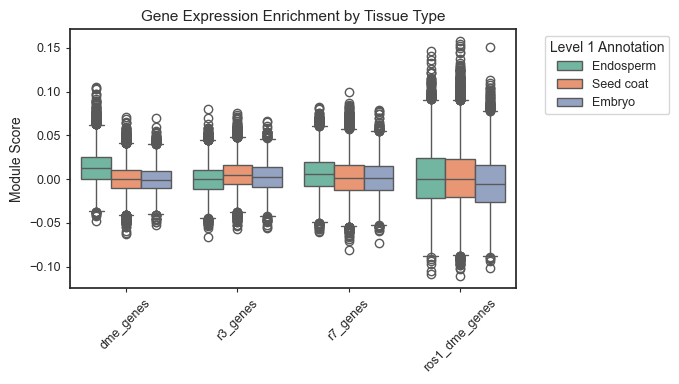

In [1211]:
plot_gene_boxplots(mod_scores[mod_scores['level_1_annotation'].isin(['Endosperm','Embryo','Seed coat'])], hue_level='level_1_annotation', figsize=(7,4), save_path=figurepath+"level1annotation_gene.pdf")

/tmp/ipykernel_3592331/2636026230.py:30: UserWarning: 
The palette list has fewer values (8) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=df_long, x='Gene_Type', y='Value', hue=hue_level, order=gene_cols,


Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/level2annotation_gene.pdf


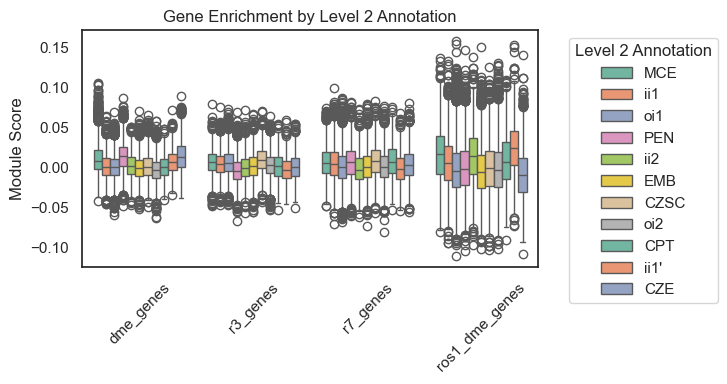

In [1052]:
plot_gene_boxplots(mod_scores[mod_scores['level_1_annotation'].isin(['Endosperm','Embryo','Seed coat'])], hue_level='level_2_annotation', figsize=(7.5,4), save_path=figurepath+"level2annotation_gene.pdf")

In [603]:
#I filtered ros1-3 TEs by diff in sRNAs in flanking regions between endosperm and embryo. 
#Just need to merge to bedfile so I can rerun ends analysis.
path="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/"
TEs=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/dmr_targets_new/dme_features/TE_fragments.bed", sep=tab, header=None, names=['chr','start','end','ID','score','strand'])
r3_TEs_diff=pd.read_csv(path+"mindiff_sumrows.csv", header=0)
r3_TEs_notdiff=pd.read_csv(path+"notdiff_sumrows.csv", header=0)
r3_TEs_diff_SE=pd.read_csv(path+"mindiff_1pt5SE_sumrows.csv", header=0)
r3_TEs_notdiff_SE=pd.read_csv(path+"notdiff_1pt5SE_sumrows.csv", header=0)


In [606]:
TEs[TEs['ID'].isin(r3_TEs_diff['ID'])].to_csv(path+"r3_TEs_mindiff_pt01.bed", sep=tab, header=False, index=False)
TEs[TEs['ID'].isin(r3_TEs_notdiff['ID'])].to_csv(path+"r3_TEs_notmindiff_pt01.bed", sep=tab, header=False, index=False)

TEs[TEs['ID'].isin(r3_TEs_diff_SE['ID'])].to_csv(path+"r3_TEs_mindiff_1pt5SE.bed", sep=tab, header=False, index=False)
TEs[TEs['ID'].isin(r3_TEs_notdiff_SE['ID'])].to_csv(path+"r3_TEs_notmindiff_1pt5SE.bed", sep=tab, header=False, index=False)


In [607]:
## Chromatin states database analsyis

In [74]:
#9 chromatin states
path="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/chromatin_state/"
states=pd.read_csv(path+"2compare/Chromatin_states_2014.bed", sep=tab, header=None, names=['chr','start','end','state'])

DMRstate=['chr','start','end','DMR','chrs','starts','ends','state']
r3_allC_states=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)
r3_allC_states['class']='ros1-3 hyperDMR'
r3_CG_states=pd.read_csv(path+"r3_v_wt_CG.DMRs.hyper_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)

r7_allC_states=pd.read_csv(path+"r7_v_wt_allC_hyper_allC.merge_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)
r7_allC_states['class']='ros1-7 hyperDMR'

r1_allC_states=pd.read_csv(path+"r1_v_wt_allC_hyper_allC.merge_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)

ros1dme_allC_states=pd.read_csv(path+"ros1_only_NEITHERcheck_matVpat_hypo_allC_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)
ros1dme_allC_states['class']='ROS1 pat, DME mat'

dme_allC_states=pd.read_csv(path+"WT_and_ros1_matVpat_hypo_allC.merge_chromatin_states_2014_intersect.bed", sep=tab, header=None, names=DMRstate).drop(['chrs','starts','ends'], axis=1)
dme_allC_states['class']='DME mat'


In [80]:
allstates=pd.concat([r3_allC_states, r7_allC_states, ros1dme_allC_states, dme_allC_states], axis=0)
allstates['state'] = allstates['state'].astype(str)


In [81]:
def plot_state_distribution_by_class(df, class_col='class', state_col='state', save_path=False):
    """
    Plots a stacked bar chart of the fraction of states (1–9) per class.

    Parameters:
        df (pd.DataFrame): Input DataFrame with 'class' and 'state' columns.
        class_col (str): Column indicating the class/category.
        state_col (str): Column indicating the state (expected to be 1–9).
    """

    # Style
    sns.set_style('white')

    # Convert state column to string for consistent coloring
    df[state_col] = df[state_col].astype(str)

    # Calculate counts
    state_counts = df.groupby([class_col, state_col]).size().unstack(fill_value=0)

    # Convert counts to fractions
    state_fractions = state_counts.div(state_counts.sum(axis=1), axis=0)

    # Order classes (optional)
    state_fractions = state_fractions.sort_index()

    # Colorblind-friendly light palette
    state_colors = [
        "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
        "#D55E00", "#CC79A7", "#999999", "#BEBADA"
    ]

    # Plotting
    fig, ax = plt.subplots(figsize=(3, 2.4))  # 1. Adjusted plot size

    bottom = np.zeros(len(state_fractions))
    
    for i, state in enumerate(sorted(state_fractions.columns, key=lambda x: int(x))):
        values = state_fractions[state].values
        ax.bar(state_fractions.index, values, bottom=bottom, label=f"{state}",  # 3. No "State"
               color=state_colors[i % len(state_colors)])
        bottom += values

    # Layout
    ax.set_ylabel("Fraction of Represented States", fontsize=9)
    ax.set_xlabel("")
    ax.tick_params(axis='both', labelsize=8)
    ax.set_ylim(0, 1)

    # 2. Rotate x-axis labels 35 degrees
    plt.xticks(rotation=35, ha='right')

    # Legend without "State", smaller font
    ax.legend(
        title="State",
        title_fontsize=9,
        fontsize=7, 
        bbox_to_anchor=(1.02, 1), 
        loc='upper left', 
        handlelength=0.8,
        borderpad=0.3,
        labelspacing=0.3
    )

    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.6)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved plot to {save_path}")

    plt.show()


Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_chromatinstates.pdf


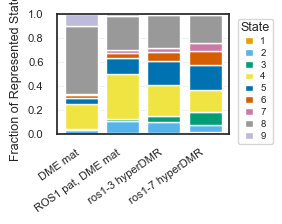

In [1159]:
plot_state_distribution_by_class(allstates, save_path=figurepath+"DMR_chromatinstates.pdf")

In [82]:
len(allstates[(allstates['class']=="ros1-3 hyperDMR") & (allstates['state'].isin(["4","5"]))])/len(allstates[(allstates['class']=="ros1-3 hyperDMR")])

0.4587664587664588

In [84]:
#DMR distribution
path="/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/dmr_dist/"
names=["chr","start","end","DMR#","Bases_cov#","Length","coverage_density"]

r1_dist=pd.read_csv(path+"r1_v_wt_allC_hyper_allC.merge_cov_100000bpwindows.bed", sep=tab, header=None, names=names)
r7_dist=pd.read_csv(path+"r7_v_wt_allC_hyper_allC.merge_cov_100000bpwindows.bed", sep=tab, header=None, names=names)
r3_dist=pd.read_csv(path+"r3_v_wt_allC_hyper_allC.merge_cov_100000bpwindows.bed", sep=tab, header=None, names=names)
ros1dme_dist=pd.read_csv(path+"ros1_only_NEITHERcheck_matVpat_hypo_allC_cov_100000bpwindows.bed", sep=tab, header=None, names=names)
dme_dist=pd.read_csv(path+"WT_and_ros1_matVpat_hypo_allC.merge_cov_100000bpwindows.bed", sep=tab, header=None, names=names)
mC=pd.read_csv(path+"wt_1_Col_spiked_CG_min5_sumby_100000bpwindows.bed", sep=tab, header=None, names=['chr','start','end','Na','mC','#C'])


In [85]:
dme_dist['coverage_smoothed'] = dme_dist['coverage_density'].rolling(window=10, center=True).mean()
ros1dme_dist['coverage_smoothed'] = ros1dme_dist['coverage_density'].rolling(window=10, center=True).mean()
r3_dist['coverage_smoothed'] = r3_dist['coverage_density'].rolling(window=10, center=True).mean()
r7_dist['coverage_smoothed'] = r7_dist['coverage_density'].rolling(window=10, center=True).mean()
r1_dist['coverage_smoothed'] = r1_dist['coverage_density'].rolling(window=10, center=True).mean()


In [86]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_tracks(
    df1, df2, df3, df_mC, chromosome, 
    label1='Sample 1', label2='Sample 2', label3='Sample 3', label_mC='mC',
    color1='blue', color2='green', color3='orange', color_mC='red',
    vertical_lines=None, figsize=(2.7, 2.1), save_path=None, smoothing_window=5
):
    """
    Plots three coverage_density tracks and one mC track over shared genomic intervals.
    """

    # Filter data to selected chromosome
    df1_chr = df1[df1['chr'] == chromosome].copy()
    df2_chr = df2[df2['chr'] == chromosome].copy()
    df3_chr = df3[df3['chr'] == chromosome].copy()
    df_mC_chr = df_mC[df_mC['chr'] == chromosome].copy()

    if df1_chr.empty or df2_chr.empty or df3_chr.empty or df_mC_chr.empty:
        print(f"No data for {chromosome} in one or more dataframes.")
        return

    # Align mC to intervals and smooth
    df_mC_chr = pd.merge(
        df1_chr[['chr', 'start', 'end']], 
        df_mC_chr[['chr', 'start', 'end', 'mC']],
        on=['chr', 'start', 'end'], how='left'
    )
    df_mC_chr['mC_smoothed'] = df_mC_chr['mC'].rolling(window=smoothing_window, center=True).mean()

    # Midpoints in Gbp
    midpoints_bp = (df1_chr['start'] + df1_chr['end']) / 2
    midpoints_mb = midpoints_bp / 1e6  # Convert from bp to Mb

    # Plot
    fig, ax1 = plt.subplots(figsize=figsize)

    # LEFT Y-AXIS: Coverage
    ax1.plot(midpoints_mb, df1_chr['coverage_smoothed'], label=label1, color=color1, linewidth=1)
    ax1.plot(midpoints_mb, df2_chr['coverage_smoothed'], label=label2, color=color2, linewidth=1)
    ax1.plot(midpoints_mb, df3_chr['coverage_smoothed'], label=label3, color=color3, linewidth=1)

    ax1.set_xlabel("Genomic Position (Mbp)", fontsize=9)
    ax1.set_ylabel("Coverage Density", fontsize=9)
    #ax1.tick_params(axis='both', labelsize=8)
    ax1.set_title(f"Chromosome: {chromosome}", fontsize=9)
    ax1.legend(loc='upper left', fontsize=7)
    ax1.tick_params(
        axis='x',
        which='both',         # affects both major and minor ticks
        bottom=True,          # show bottom ticks
        top=False,            # hide top ticks
        labelbottom=True,     # show bottom labels
        length=3,             # length of tick marks
        width=0.8,             # thickness of tick marks
    )
    ax1.tick_params(axis='both', labelsize=8)  # Left Y-axis tick label size

    # Optional vertical lines in Gbp
    if vertical_lines:
        for vline in vertical_lines:
            ax1.axvline(x=vline / 1e9, color='gray', linestyle='--', linewidth=0.8)

    # RIGHT Y-AXIS: mC
    ax2 = ax1.twinx()
    ax2.plot(midpoints_mb, df_mC_chr['mC_smoothed'], label=label_mC, color=color_mC, linewidth=0.5)
    ax2.set_ylabel("mCG", fontsize=9)
    ax2.tick_params(axis='y', labelsize=8)
    ax2.legend(loc='upper right', fontsize=7)

    plt.tight_layout()

    # Save
    if save_path:
        plt.savefig(save_path, dpi=300)
        print(f"Saved plot to {save_path}")

    plt.show()


In [87]:

# Align mC data to df1's intervals (assuming df1 and df2 share intervals)
df_mC_aligned = pd.merge(
    ros1dme_dist[['chr', 'start', 'end']],  # reference intervals
    mC[['chr', 'start', 'end', 'mC']],  # mC data
    on=['chr', 'start', 'end'],
    how='left'  # keep all rows from df1; insert NaN where no match
)

df_mC_chr=df_mC_aligned
df_mC_chr['mC_smoothed'] = df_mC_chr['mC'].rolling(window=10, center=True).mean()


Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_density_Chr4_100kb_rollingwin10.pdf


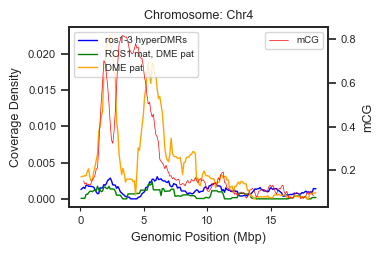

In [1222]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1 mat, DME pat",
    label3="DME pat",
    label_mC="mCG",
    chromosome='Chr4',
    figsize=(4, 2.7),
    save_path=figurepath+"DMR_density_Chr4_100kb_rollingwin10.pdf"
)

Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_density_Chr5_100kb_rollingwin10.pdf


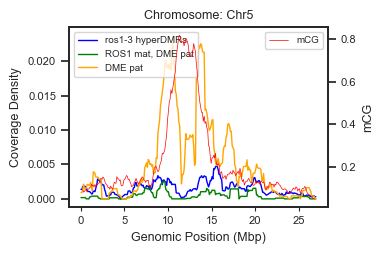

In [1223]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1 mat, DME pat",
    label3="DME pat",
    label_mC="mCG",
    chromosome='Chr5',
    figsize=(4, 2.7),
    save_path=figurepath+"DMR_density_Chr5_100kb_rollingwin10.pdf"
)

Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_density_Chr1_100kb_rollingwin10.pdf


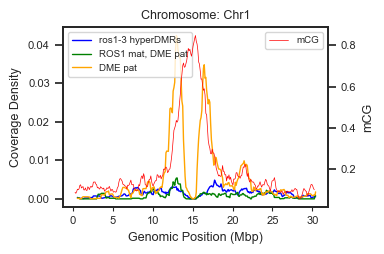

In [1224]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1 mat, DME pat",
    label3="DME pat",
    label_mC="mCG",
    chromosome='Chr1',
    figsize=(4, 2.7),
    save_path=figurepath+"DMR_density_Chr1_100kb_rollingwin10.pdf"
)

Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_density_Chr2_100kb_rollingwin10.pdf


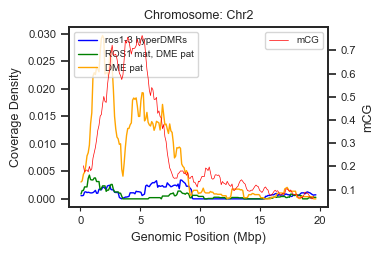

In [1225]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1 mat, DME pat",
    label3="DME pat",
    label_mC="mCG",
    chromosome='Chr2',
    figsize=(4, 2.7),
    save_path=figurepath+"DMR_density_Chr2_100kb_rollingwin10.pdf"
)

In [89]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1/DME regions",
    label3="DME regions",
    label_mC="mCG",
    chromosome='Chr4',
    figsize=(4, 2.7),
    save_path=figurepath+"DMR_density_Chr4_100kb_rollingwin10.pdf"
)

NameError: name 'figurepath' is not defined

Saved plot to /lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/round2/python_figures/DMR_density_Chr5_100kb_rollingwin10.pdf


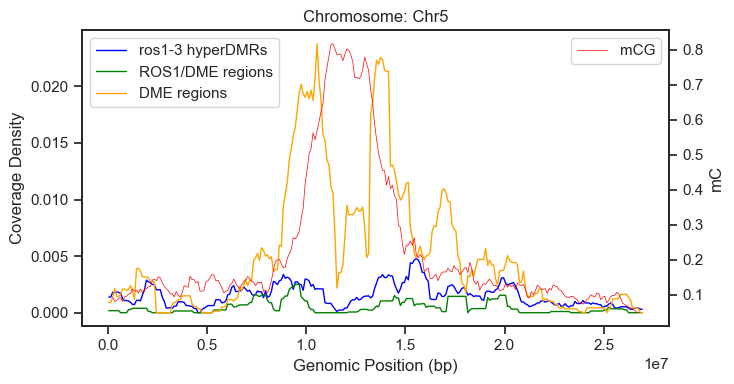

In [929]:
plot_combined_tracks(
    df1=r3_dist,
    df2=ros1dme_dist,
    df3=dme_dist,
    df_mC=df_mC_chr,
    label1="ros1-3 hyperDMRs",
    label2="ROS1/DME regions",
    label3="DME regions",
    label_mC="mCG",
    chromosome='Chr5',
    figsize=(7.5,4),
    save_path=figurepath+"DMR_density_Chr5_100kb_rollingwin10.pdf"
)

In [1058]:
#sRNA dataframes
r3_TE_nodup=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/TEs_1kb_r3_hyper_nodup.bed", 
                        sep=tab, header=None, names=['chr','start','end','ID','score','strand'])
r3_TE_min1sd=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/mindiff_1SD_sumrows.csv", header=0)
r3_TE_notthresh=pd.read_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/notdiff_1SD_sumrows.csv", header=0)

In [1066]:
len(r3_TE_notthresh.drop_duplicates("ID"))+len(r3_TE_min1sd.drop_duplicates("ID"))

1463

In [1071]:
r3_TE_nodup[r3_TE_nodup['ID'].isin(r3_TE_min1sd['ID'])].to_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/r3_TEs_min1SD_sRNAdiff_final.bed", 
                                                               sep=tab, header=None, index=None)
r3_TE_nodup[r3_TE_nodup['ID'].isin(r3_TE_notthresh['ID'])].to_csv("/lab/solexa_gehring/elizabeth/ros1_endo_review_analysis/sRNAs/r3_TEs_not_min1SD_sRNAdiff_final.bed", 
                                                               sep=tab, header=None, index=None)
